In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.metrics import accuracy_score,classification_report,mean_absolute_error

In [2]:
df1 = pd.read_csv('car_price.csv')

In [3]:
df1.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [4]:
#cheack dublicate values
df1.duplicated().sum()

0

In [5]:
# sales_ID, name, Region, State or Province, City,max_power,torque,sold variables are not much important to price hence we drop these columns
df2 = df1.drop(['Sales_ID','Region','State or Province','City','max_power','torque','sold'],axis=1)

In [6]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,5
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,5
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,5


In [7]:
df2.isnull().sum() #to check is there any null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
seats            0
dtype: int64

In [8]:
df2['name'].value_counts()

Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          466
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
BMW            118
Skoda          104
Nissan          81
Jaguar          71
Volvo           67
Datsun          65
Mercedes        54
Fiat            41
Audi            40
Lexus           34
Jeep            31
Mitsubishi      14
Force            6
Land             6
Isuzu            5
Kia              4
Ambassador       4
Daewoo           3
MG               3
Ashok            1
Opel             1
Name: name, dtype: int64

In [9]:
df2['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [10]:
df2['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark_Dealer     236
Name: seller_type, dtype: int64

In [11]:
df2['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [12]:
df2['owner'].value_counts()

First_Owner           5215
Second_Owner          2016
Third_Owner            510
Fourth_Above_Owner     160
Test_Drive_Car           5
Name: owner, dtype: int64

In [13]:
# now cheak how many uniqe values in each categorical column beacause if there is lotof uniqe values we have to add more dummy variables.
print(len(df2.fuel.unique()))
print(len(df2.seller_type.unique()))
print(len(df2.transmission.unique()))
print(len(df2.name.unique()))
print(len(df2.owner.unique()))

4
3
2
31
5


In [14]:
df2.selling_price.describe()

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [15]:
#cheack the outlyers


In [16]:
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,5
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,5
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,5
...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First_Owner,18.50,1197,5
7902,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,5
7903,Maruti,2009,382000,120000,Diesel,Individual,Manual,First_Owner,19.30,1248,5
7904,Tata,2013,290000,25000,Diesel,Individual,Manual,First_Owner,23.57,1396,5


In [17]:
data = df2.drop(["name","year","fuel","seller_type","transmission","owner","selling_price"],axis=1)

In [18]:
data

,km_driven,mileage,engine,seats
0,145500,23.40,1248,5
1,120000,21.14,1498,5
2,140000,17.70,1497,5
3,127000,23.00,1396,5
4,120000,16.10,1298,5
...,...,...,...,...
7901,110000,18.50,1197,5
7902,119000,16.80,1493,5
7903,120000,19.30,1248,5
7904,25000,23.57,1396,5


<AxesSubplot:>

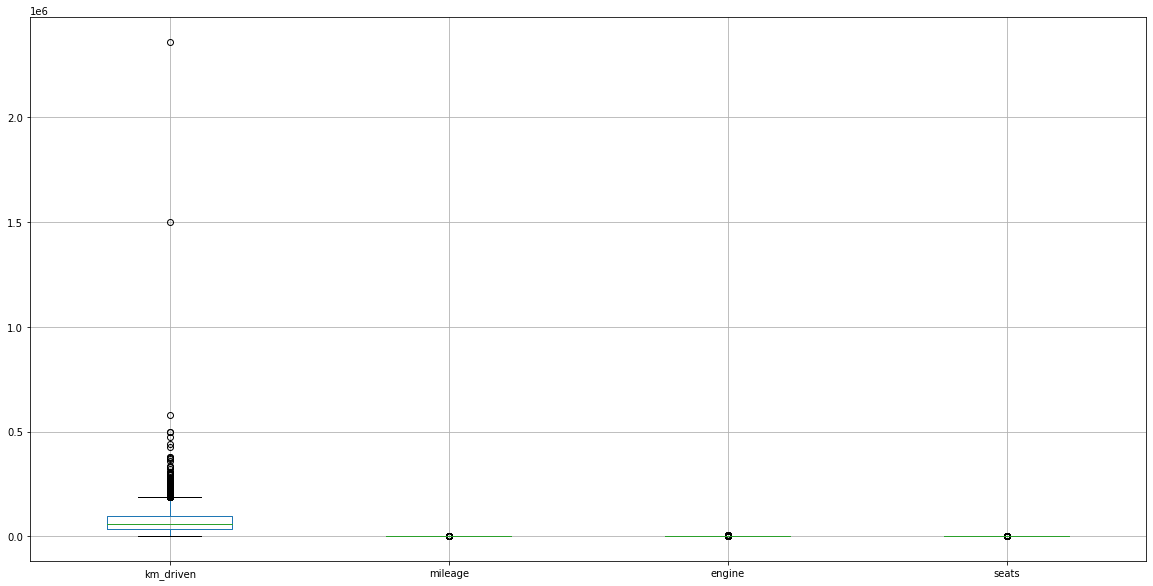

In [19]:
data.boxplot()

<AxesSubplot:>

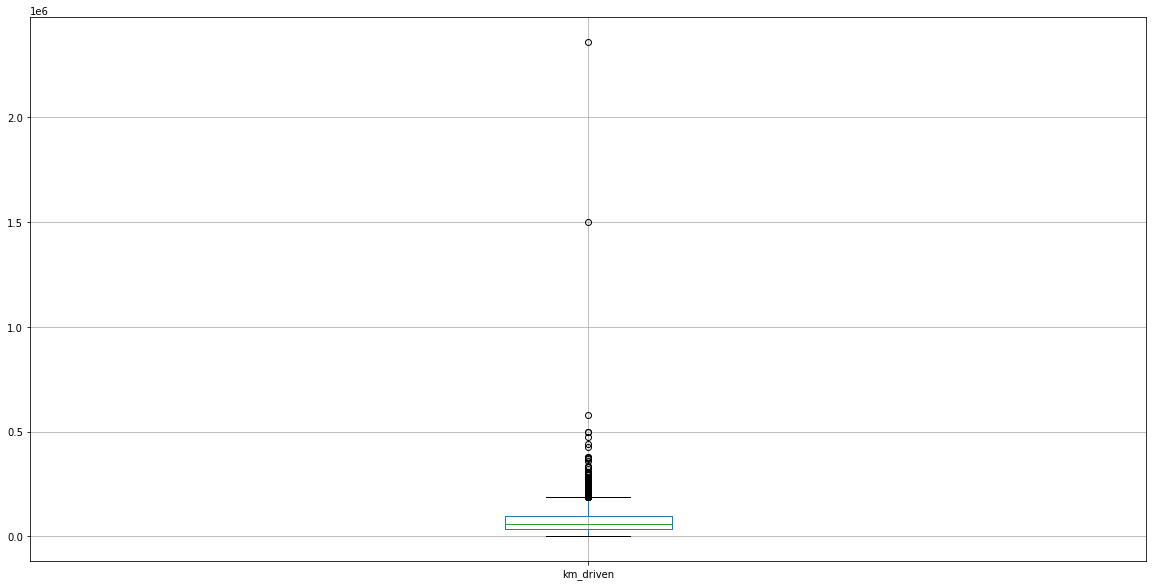

In [20]:
data[["km_driven"]].boxplot()

In [21]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)

In [22]:
Q1

km_driven    35000.00
mileage         16.78
engine        1197.00
seats            5.00
Name: 0.25, dtype: float64

In [23]:
IQR=Q3-Q1

In [24]:
IQR

km_driven    60425.00
mileage          5.54
engine         385.00
seats            0.00
dtype: float64

In [25]:
Out_row = ((data<(Q1-1.5*IQR))|(data>(Q3>+1.5*IQR))).any(axis=1)

In [26]:
df3 = df2[~Out_row]

In [27]:
Out_row

0       True
1       True
2       True
3       True
4       True
        ... 
7901    True
7902    True
7903    True
7904    True
7905    True
Length: 7906, dtype: bool

In [28]:
df2.shape

(7906, 11)

In [29]:
df3.shape #there are no any outlyers

(0, 11)

In [30]:
df3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats


In [31]:
#now we add dummy variable using one hot encording

In [32]:
dummies_1 = pd.get_dummies(df2.name)
dummies_2 = pd.get_dummies(df2.fuel)
dummies_3 = pd.get_dummies(df2.seller_type)
dummies_4 = pd.get_dummies(df2.transmission)
dummies_5 = pd.get_dummies(df2.owner)

In [33]:
dummies_1




,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,...,Mercedes,Mitsubishi,Nissan,Opel,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
dummies_2

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
7901,0,0,0,1
7902,0,1,0,0
7903,0,1,0,0
7904,0,1,0,0


In [35]:
dummies_3

,Dealer,Individual,Trustmark_Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
7901,0,1,0
7902,0,1,0
7903,0,1,0
7904,0,1,0


In [36]:
dummies_4

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
7901,0,1
7902,0,1
7903,0,1
7904,0,1


In [37]:
dummies_5

,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7901,1,0,0,0,0
7902,0,1,0,0,0
7903,1,0,0,0,0
7904,1,0,0,0,0


In [38]:
dummies =pd.concat([dummies_1,dummies_2,dummies_3,dummies_4,dummies_5],axis=1)

In [39]:
dummies

,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,...,Dealer,Individual,Trustmark_Dealer,Automatic,Manual,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
7902,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
7903,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
7904,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [40]:
df4=pd.concat([df2,dummies],axis=1)

In [41]:
df4.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Dealer,Individual,Trustmark_Dealer,Automatic,Manual,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,...,0,1,0,0,1,1,0,0,0,0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,...,0,1,0,0,1,0,0,1,0,0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,...,0,1,0,0,1,1,0,0,0,0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,...,0,1,0,0,1,1,0,0,0,0


In [42]:
df4.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Dealer,Individual,Trustmark_Dealer,Automatic,Manual,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,...,0,1,0,0,1,1,0,0,0,0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,...,0,1,0,0,1,0,0,1,0,0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,...,0,1,0,0,1,1,0,0,0,0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,...,0,1,0,0,1,1,0,0,0,0


In [43]:
#now we have to remove categorical variables

df5 = df4.drop(['name','fuel','seller_type','transmission','owner'],axis=1)

In [44]:
df5.head()

,year,selling_price,km_driven,mileage,engine,seats,Ambassador,Ashok,Audi,BMW,...,Dealer,Individual,Trustmark_Dealer,Automatic,Manual,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
0,2014,450000,145500,23.40,1248,5,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,21.14,1498,5,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,17.70,1497,5,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,23.00,1396,5,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,16.10,1298,5,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [64]:
#now we set x and y variables
X = df5.drop(['selling_price'],axis=1)
Y = df5['selling_price']

In [65]:
X.head()

,year,km_driven,mileage,engine,seats,Ambassador,Ashok,Audi,BMW,Chevrolet,...,Dealer,Individual,Trustmark_Dealer,Automatic,Manual,First_Owner,Fourth_Above_Owner,Second_Owner,Test_Drive_Car,Third_Owner
0,2014,145500,23.40,1248,5,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,120000,21.14,1498,5,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,140000,17.70,1497,5,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,127000,23.00,1396,5,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,120000,16.10,1298,5,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [66]:
Y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [69]:
# find the best model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[100,150]
                
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.922e+13, tolerance: 4.090e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+13, tolerance: 4.416e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+12, tolerance: 

,model,best_score,best_params
0,linear_regression,0.821101,{'normalize': True}
1,lasso,0.821092,"{'alpha': 1, 'selection': 'cyclic'}"
2,Random_forest,0.950837,{'n_estimators': 150}
3,decision_tree,0.938712,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [70]:
B_model = RandomForestRegressor(n_estimators=100)

In [71]:
B_model.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_ptedict = B_model.predict(x_test)

In [73]:
mean_absolute_error(y_test,y_ptedict)

75355.94605141746

In [74]:
B_model.score(x_test,y_test)

0.9599837331520251

In [75]:
X.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'seats', 'Ambassador',
       'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi',
       'Nissan', 'Opel', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo', 'CNG', 'Diesel', 'LPG', 'Petrol', 'Dealer', 'Individual',
       'Trustmark_Dealer', 'Automatic', 'Manual', 'First_Owner',
       'Fourth_Above_Owner', 'Second_Owner', 'Test_Drive_Car', 'Third_Owner'],
      dtype='object')

In [76]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,5
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,5
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third_Owner,17.70,1497,5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,5


In [77]:
loc_index1 = np.where(X.columns==name)[0][0]

NameError: name 'name' is not defined

In [80]:
def predict_price(name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats):    
    loc_index1 = np.where(X.columns==name)[0][0]
    loc_index2 = np.where(X.columns==fuel)[0][0]
    loc_index3 = np.where(X.columns==seller_type)[0][0]
    loc_index4 = np.where(X.columns==transmission)[0][0]
    loc_index5 = np.where(X.columns==owner)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = km_driven
    x[2] = mileage
    x[3] = engine
    x[4] = seats
    if loc_index1 >= 0:
        x[loc_index1] = 1
    if loc_index2 >= 0:
        x[loc_index2] = 1
    if loc_index3 >= 0:
        x[loc_index3] = 1
    if loc_index4 >= 0:
        x[loc_index4] = 1
    if loc_index5 >= 0:
        x[loc_index5] = 1
    

    return B_model.predict([x])[0]

In [81]:
predict_price('Maruti',2014, 145654,'Petrol','Individual','Manual','First_Owner',24.12,1248,5)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


470359.92

In [82]:
import pickle
with open('Used_car_price_model.pickle','wb') as f:
    pickle.dump(B_model,f)

In [83]:
#we wat to import all the colums we import that in to json file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [84]:
X.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'seats', 'Ambassador',
       'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Mitsubishi',
       'Nissan', 'Opel', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo', 'CNG', 'Diesel', 'LPG', 'Petrol', 'Dealer', 'Individual',
       'Trustmark_Dealer', 'Automatic', 'Manual', 'First_Owner',
       'Fourth_Above_Owner', 'Second_Owner', 'Test_Drive_Car', 'Third_Owner'],
      dtype='object')